In [33]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
import matplotlib.pyplot as plt
import os,sys
import glob
import numpy as np
from numpy import *
import scipy 
from scipy import interpolate
sys.path.append('/home/jbane/headers')
from SQLFuncs import *
import scipy.constants as sc



plt.style.use('seaborn-white')

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

i=11
tgt = "D2"
#file_name = "/home/jbane/tritium/T2_externals/OUT/marathon_kin{}_{}.out".format(i,tgt)
file_name2 = "/home/jbane/tritium/T2_externals/OUT/marathon_kin{}_{}.out".format("9",tgt)

In [52]:
#table3 = pd.read_table(file_name,delim_whitespace=True,dtype=float)
table2 = pd.read_table(file_name2,delim_whitespace=True,dtype=float)
#table=pd.concat([table3,table2])
table=table2
table["RC"]=table["Sig_Born"]/table["Sig_Rad"]
table["RC100"]=table["Sig_Born"]/table["Sig_Rad"]*100
table["W2"]=0.989**2 + 2*0.989*(table["***Ebeam"]- table["Eprime"]) - table["Q2"]
table = table.dropna()



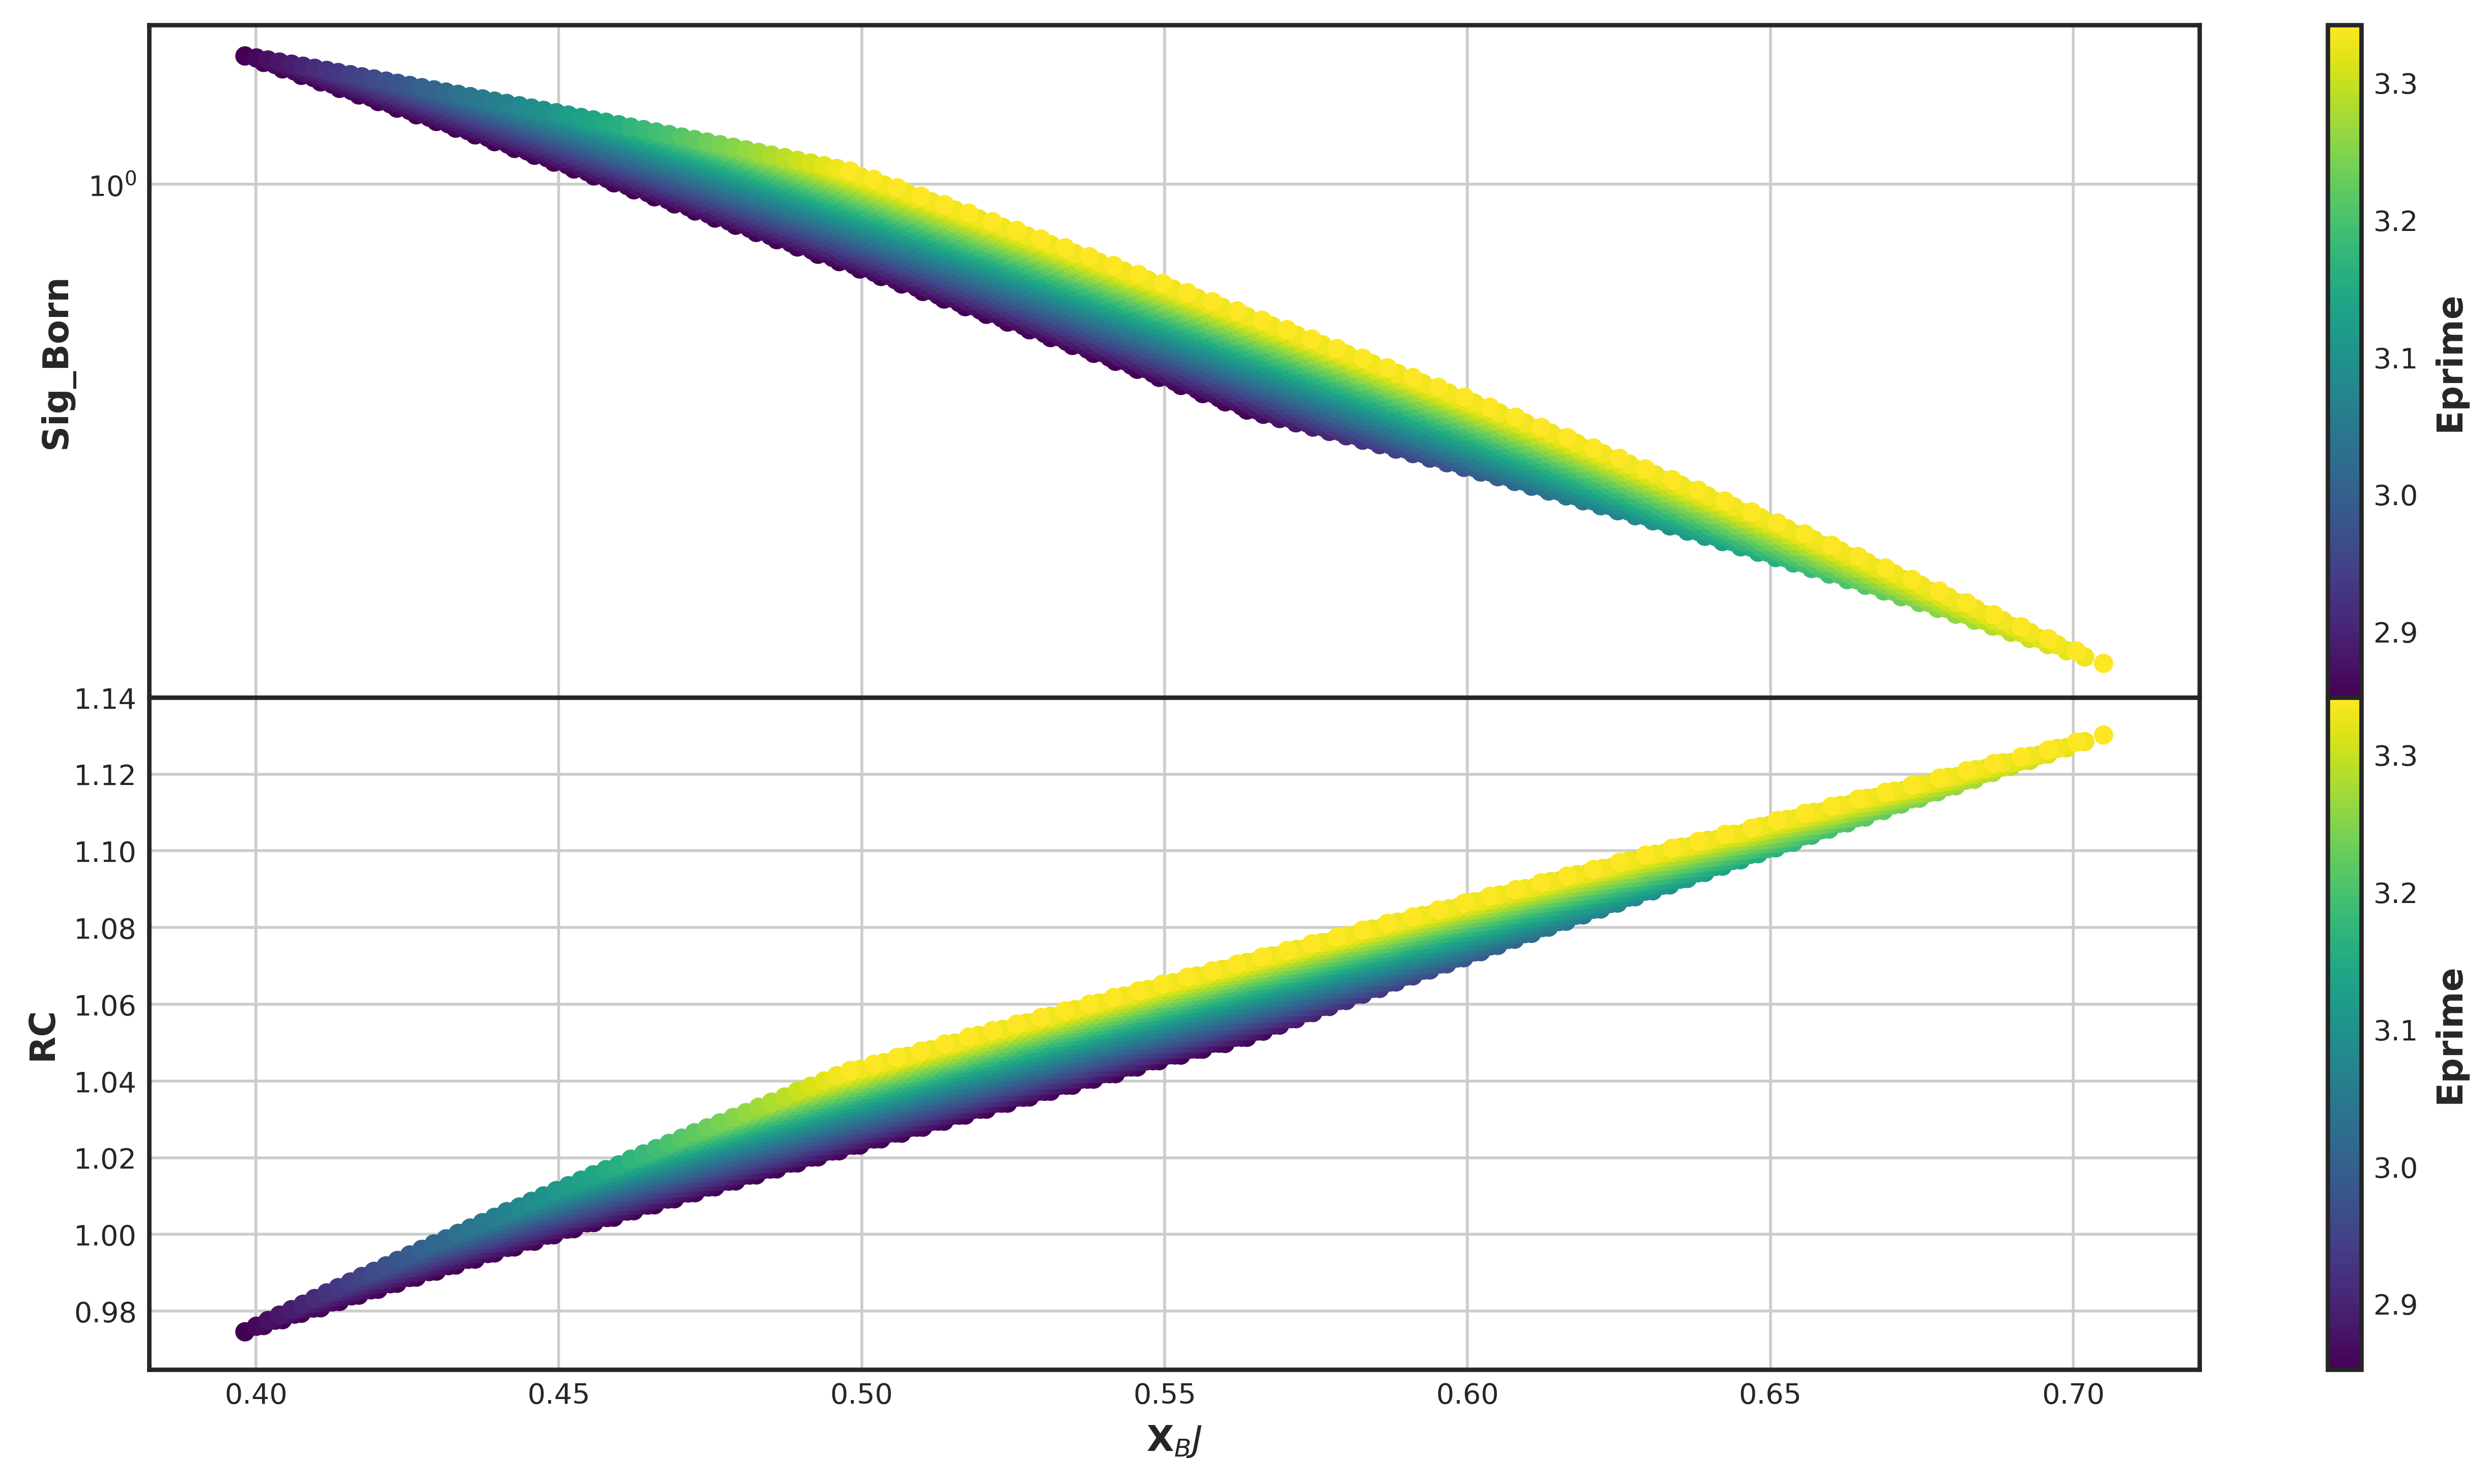

In [60]:
z="Eprime"

table1=table.copy()  #[ (table["RC"]>0.870) & (table["RC"]<0.875) & (table["x"]>0.18)& (table["x"]<0.22)].copy()
fig=plt.figure(dpi=500,figsize=(13,7))
ax=fig.add_subplot(211)
#table1.plot(ax=ax,x="x",y="Sig_Rad",c=z,kind='scatter',cmap="viridis")
bx=fig.add_subplot(212)
table1.plot.scatter(ax=ax,x="x",y="Sig_Born",c=z,cmap="viridis")
#cx=fig.add_subplot(313)
table1.plot(ax=bx,x="x",y="RC",kind='scatter',c=z,cmap="viridis")
ax.grid("True")
#ax.set_xlim(0.3,0.65)
ax.set_yscale("log")
#bx.set_yscale("log")
#cx.grid("True")
bx.grid("True")
bx.set_xlabel("X$_BJ$")
plt.xlabel("X$_BJ$")
#fig.xlabel("X$_{BJ}$")
fig.subplots_adjust(hspace=0)  

(29, 30)

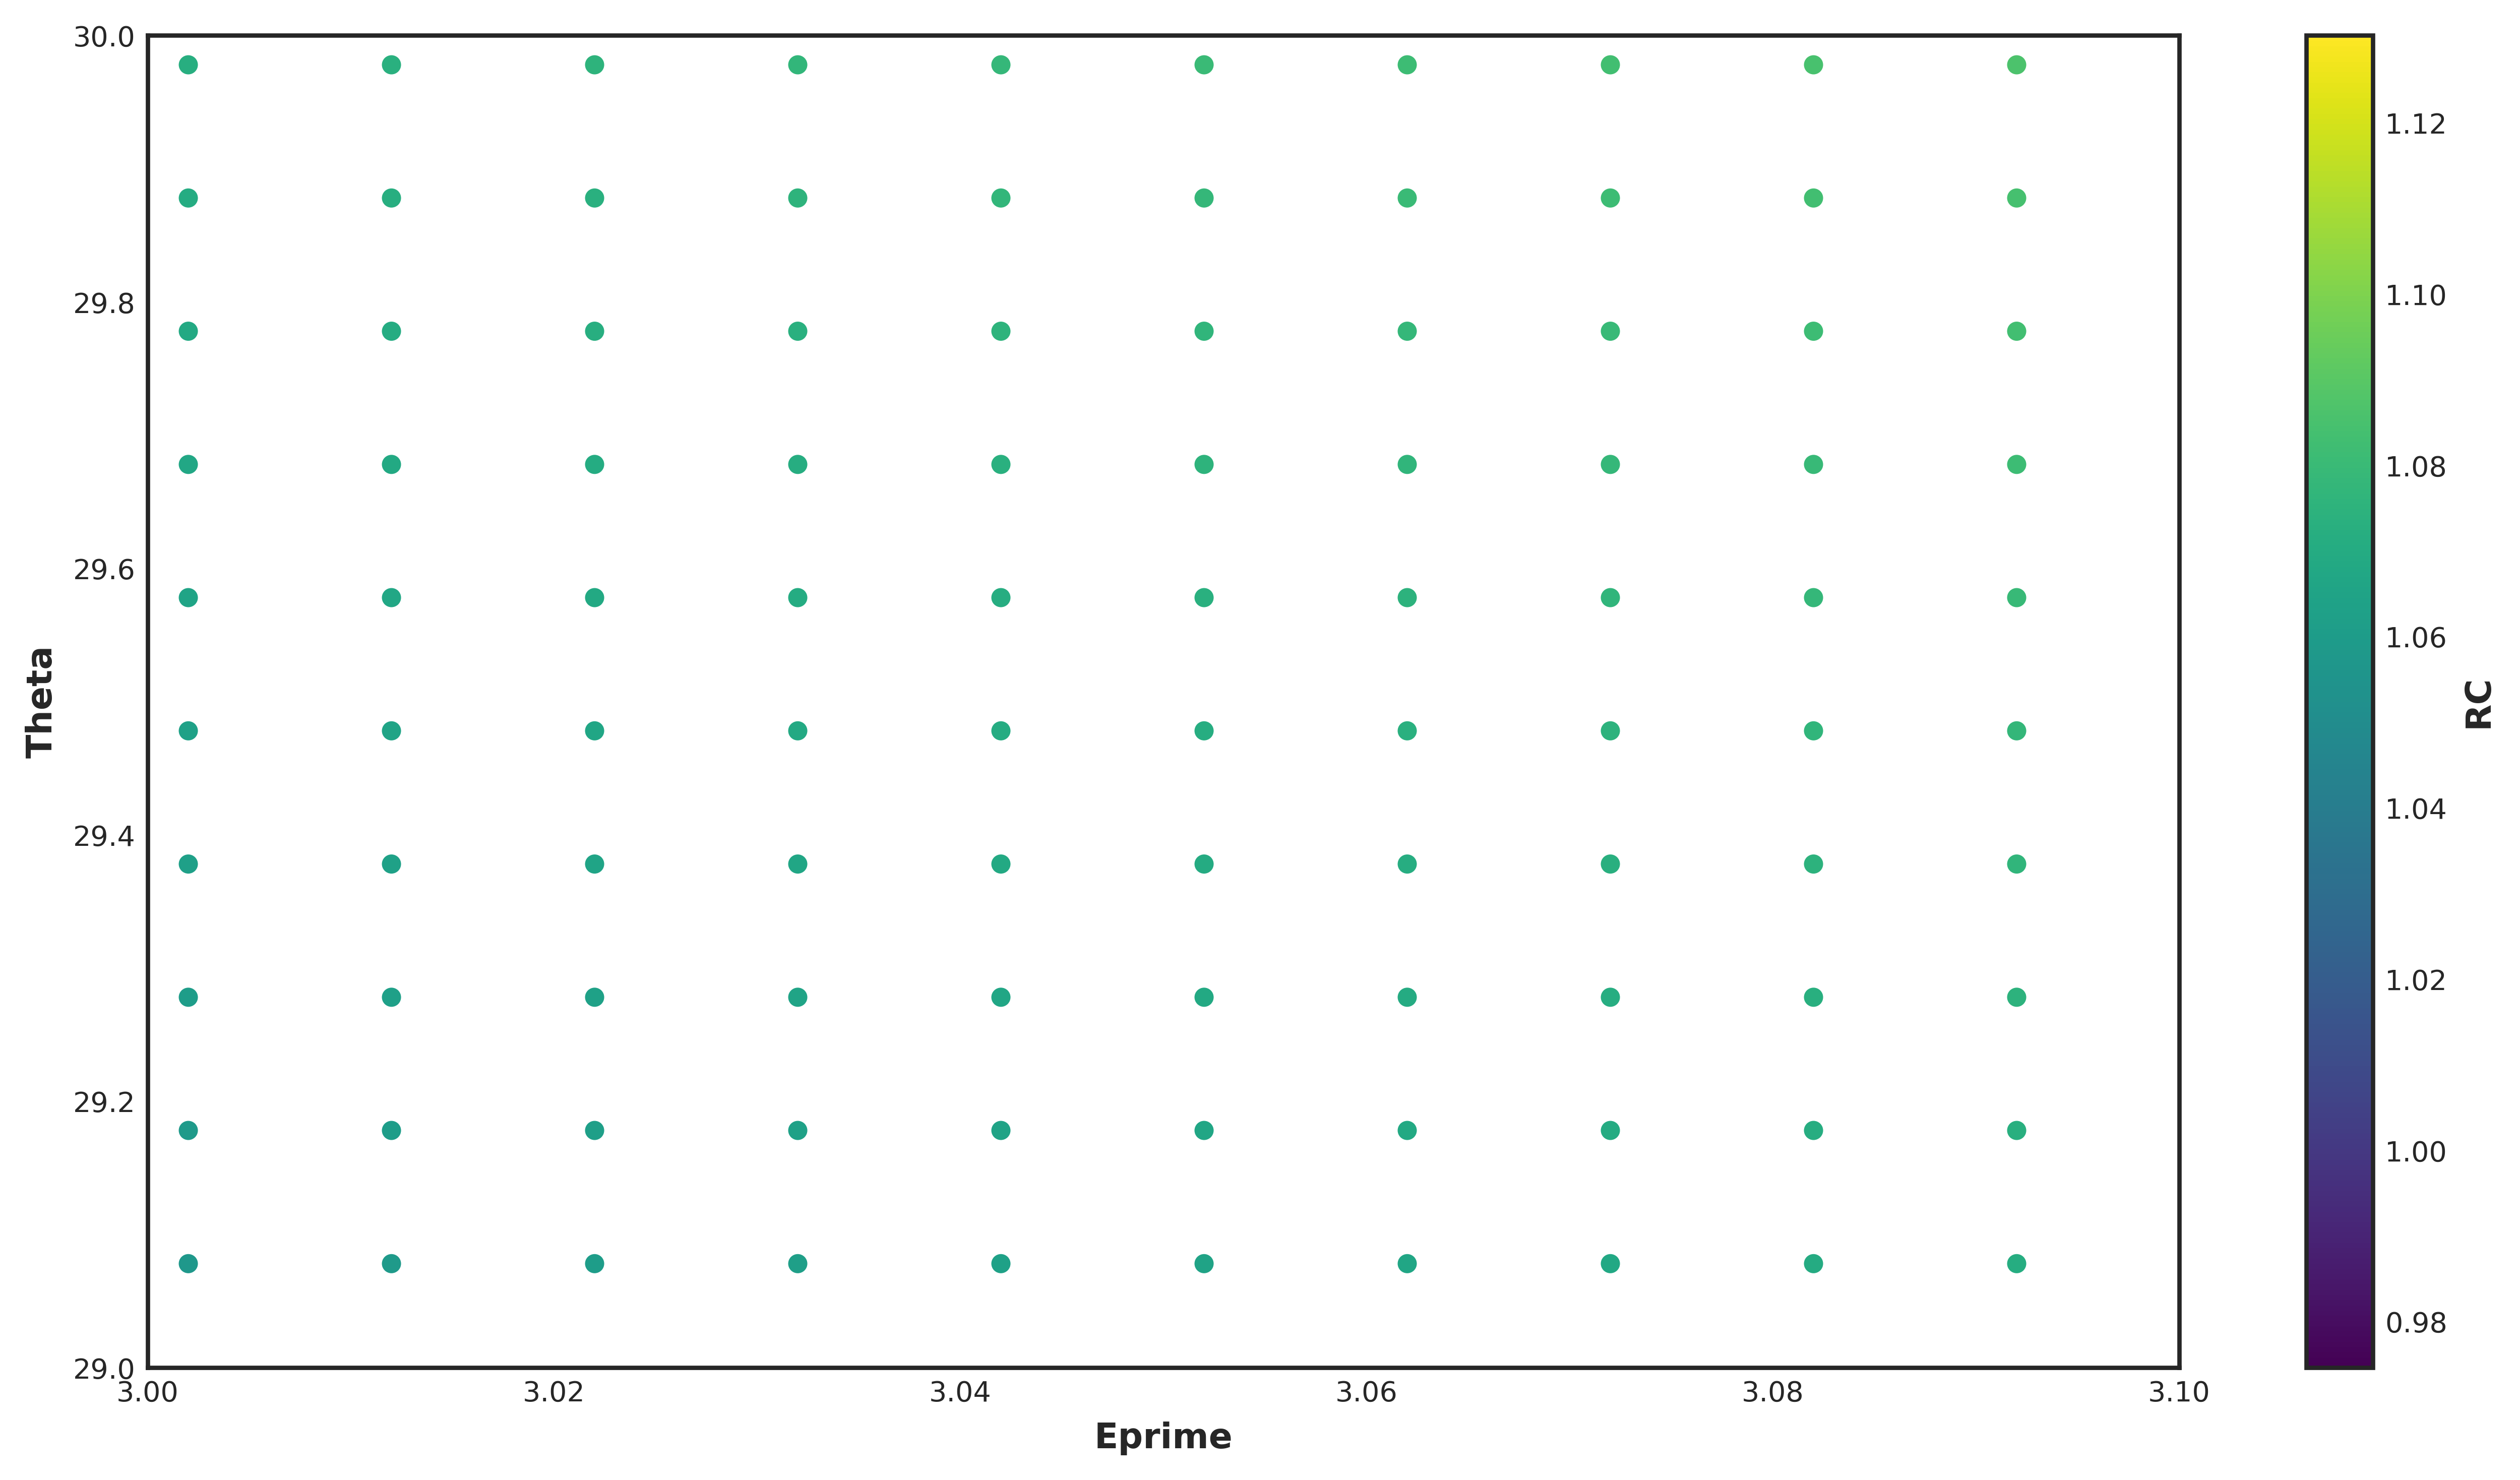

In [67]:

fig1=plt.figure(dpi=500,figsize=(13,7))
ax1=fig1.subplots()
table1.plot(ax=ax1,x="Eprime",y="Theta",kind='scatter',c='RC',cmap="viridis")
ax1.set_xlim(3,3.1)
ax1.set_ylim(29,30)


In [46]:
a[1].label_outer()



In [4]:

total_lum("D2","15","all")

switching debug to False


(1060926870.6402193, 1010441.4813896618)

In [218]:
10817+30500+11258

52575

In [3]:
    #############
import mysql.connector
db_user= 'triton-user'
db_pswd= '3He3Hdata'
db_name= 'triton-work'
db_host= 'halladb'
a=[]

In [79]:


tgt=SQLF.SQLtar(run)  
charge,current = SQLF.SQLCharge(run,0)


target=SQLF.gettgtlong(tgt)

cnx = mysql.connector.connect(user=db_user,host=db_host,database=db_name, password=db_pswd)
cursor = cnx.cursor(buffered=True)
query1 = 'select density_par_0,density_err_0,density_par_1,density_err_1,density_par_2,density_err_2,density_CV_0,density_CV_1,density_CV_2 from MARATHONTargetInfo where name=\"{}\"'.format(target)
cursor.execute(query1)
results= cursor.fetchall()

dens_par0=results[0][0]
dens_err0=results[0][1]
dens_par1=results[0][2]
dens_err1=results[0][3]
dens_par2=results[0][4]
dens_err2=results[0][5]
dens_CV0 =results[0][6]
dens_CV1 =results[0][7]
dens_CV2 =results[0][8]

err0 = dens_err0
err1 = dens_err1*pow(current,2)
err2 = dens_err2*pow(current,4)
CV0 = 2*current*dens_CV0
CV1 = 2*current*current*dens_CV1
CV2 = 2*pow(current,3)*dens_CV2

dens_cor = dens_par0 + dens_par1*current + dens_par2*pow(current,2)
Cerr1 = np.sqrt(err0 + err1 + err2 + CV0+CV1+CV2)
Cerr1 = Cerr1 * dens_cor
print(" correction facasdsadasdtor = %.4f  with error of +- %.5f."%(dens_cor,Cerr1))


 correction facasdsadasdtor = 0.9056  with error of +- 0.00126.


In [7]:
a=SQLtar(1863)
gettgtlong(a)

'Deuterium'

In [123]:
def Calc_Lum(run):
    tgt=SQLF.SQLtar(run)  
    charge,current = SQLF.SQLCharge(run,0)
    den_cor,den_cor_err=Dens_Cor(run)

    if tgt == "Tritium" or tgt == "Tritium ":
        atomicMass = 3.016;
    elif(tgt == "Helium-3"):
        atomicMass = 3.016;
    elif(tgt == "Deuterium"):
        atomicMass = 2.014102;
    elif(tgt == "Hydrogen"):
        atomicMass = 1.007947;
    elif(tgt=="Carbon"):
        atomicMass = 12.01;

    Qe= sc.e
    Na=sc.N_A
    CMtoNB=1.0e33;

    target=SQLF.gettgtlong(tgt)

    cnx = mysql.connector.connect(user=db_user,host=db_host,database=db_name, password=db_pswd)
    cursor = cnx.cursor(buffered=True)
    query1 = 'select Thickness, Thickness_err from MARATHONTargetInfo where name=\"{}\"'.format(target)
    cursor.execute(query1)
    results= cursor.fetchall()

    tgt_thick=results[0][0]
    thick_err=results[0][1]


    charge_E = charge / ( Qe*1e6)
    charge_err = 0.005
    lumin = (charge_E*tgt_thick*den_cor*Na/atomicMass)/CMtoNB

    lum_err = np.sqrt( pow(charge_err,2) +pow((thick_err/(tgt_thick*1.0)),2)  +pow(den_cor_err,2) )
    lum_err=lum_err*lumin
    print(" Luminosity = %.2f  with error of +- %.3f abs."%(lumin,lum_err))
    return lumin,lum_err

def total_lum(tgt,kin,suf)
    runlum={}
    runlist=SQLRuns(tgt,kin,suf)
    print(runlist)
    total_lum=0.0
    total_err=0.0
    for i in runlist:
        print(i,runlist[i])
        runlum[i]=Calc_Lum(runlist[i])
        total_lum= total_lum + runlum[i][0]
        total_err = np.sqrt(  pow(total_err,2) + pow(runlum[i][1],2))
    return total_lum,total_err
    
    print(runlum[i],total_lum,total_err/total_lum)
    



In [124]:
def Total_lum(tgt,kin):


 correction factor = 0.8901  with error of +- 0.00181.
 Luminosity = 8859586.75  with error of +- 68735.867 abs.


(8859586.754422411, 68735.86715812291)

In [95]:
sc.N_A

6.022140857e+23

In [27]:
def PC(tgt,xbj):
    target=gettgtlong(tgt)

    cnx = mysql.connector.connect(user=db_user,host=db_host,database=db_name, password=db_pswd)
    cursor = cnx.cursor(buffered=True)
    query1 = 'select positron_par_1, positron_err_1, positron_par_2, positron_err_2, positron_err_covariance from MARATHONTargetInfo where name=\"{}\"'.format(target)
    cursor.execute(query1)
    results= cursor.fetchall()

    par1=results[0][0]
    err1=results[0][1]
    par2=results[0][2]
    err2=results[0][3]
    CV=results[0][4]
    PCfact = exp(par1+par2*xbj)
    PC_error = PCfact*sqrt(err1+err2*xbj*xbj +2.0*CV*xbj)
    
    return PCfact, PC_error

def ECC(tgt,kin):
    filen="/home/jbane/Documents/ECC_table.csv"
    ECCdf=pd.read_csv(filen)
    ECCdf=ECCdf.fillna(1)
    ECCdf=ECCdf.rename(index=str, columns={"Unnamed: 0":"Kin"})
    ECCf=ECCdf[tgt]["kin"==kin]
    return ECCf





In [31]:
a=ECCdf['D2']["kin"==2]

In [32]:
a

0.0186

In [65]:
200/1000.0 * 200/1000.0 * 0.2 *3.1 *1000

24.800000000000004

In [71]:
filen="/home/jbane/Documents/ECC_table.csv"
ECCdf=pd.read_csv(filen)
ECCdf=ECCdf.fillna(0.0)
ECCdf=ECCdf.rename(index=str, columns={"Unnamed: 0":"Kin"})

In [72]:
ECCdf

,Kin,H3,He3,D2,H
0,0,0.02342,0.027100,0.018600,0.02922
1,1,0.02185,0.025120,0.011380,0.02380
2,2,0.02028,0.022940,0.010200,0.02090
3,3,0.01630,0.018390,0.008206,0.01780
4,4,0.01540,0.017270,0.009348,0.01760
5,5,0.01445,0.015738,0.008640,0.00000
6,7,0.01177,0.012500,0.008310,0.00000
7,9,0.00900,0.009740,0.005700,0.00000
8,11,0.00690,0.007150,0.005121,0.00000
9,13,0.00550,0.005723,0.003790,0.00000


In [96]:
base={}
steps=[0.06,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.04,0.03,0.04,0.04,0.06,0.05,0.05,0.06,0.07,0.08]
base[0]=0.14
basestr="{"
stepstr="{"
for i in range(len(steps)):

    base[i+1]=base[i]+steps[i]
    basestr=basestr+"{0:3.2f},".format(base[i])
    stepstr=stepstr+"{0:3.2f},".format(steps[i])
basestr=basestr[0:len(basestr)-1]
stepstr=stepstr[0:len(stepstr)-1]
basestr=basestr+"}"
stepstr=stepstr+"}"
print(basestr)
print(stepstr)
    


{0.14,0.20,0.23,0.26,0.29,0.32,0.35,0.38,0.41,0.44,0.47,0.51,0.55,0.61,0.66,0.71,0.77,0.84}
{0.06,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.04,0.04,0.06,0.05,0.05,0.06,0.07,0.08}


In [78]:
steps[0]

TypeError: 'set' object does not support indexing